# Fashion MNIST

### 데이터 불러오기

In [368]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [369]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [370]:
from tensorflow.keras.datasets import fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = \
    fashion_mnist.load_data()

In [371]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [372]:
X_train.shape,Y_train.shape

((60000, 28, 28), (60000,))

## 데이터 전처리

In [373]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64') / 255

In [374]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [375]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [376]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

참고 사이트 
- https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/
- https://m.blog.naver.com/laonple/220808903260
- https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

In [377]:
# 검색하다보니 배치정규화 BatchNormalization가 있어 사용해 보았습니다
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',data_format='channels_last',padding='same',
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, 
                 kernel_size=(3, 3),data_format='channels_last',padding='same',
                 activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), data_format='channels_last',padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [378]:
model.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam'
)

In [379]:
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [380]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss',patience=20)

In [381]:
history = model.fit(X_train,Y_train,validation_split=0.2,verbose=0,
                    epochs=150,batch_size=100,
                    callbacks=[checkpointer,early_stopping])


Epoch 00001: val_loss improved from inf to 1.09456, saving model to ./model/best001-1.0946.hdf5

Epoch 00002: val_loss improved from 1.09456 to 0.31250, saving model to ./model/best002-0.3125.hdf5

Epoch 00003: val_loss improved from 0.31250 to 0.28351, saving model to ./model/best003-0.2835.hdf5

Epoch 00004: val_loss did not improve from 0.28351

Epoch 00005: val_loss improved from 0.28351 to 0.25541, saving model to ./model/best005-0.2554.hdf5

Epoch 00006: val_loss improved from 0.25541 to 0.25249, saving model to ./model/best006-0.2525.hdf5

Epoch 00007: val_loss improved from 0.25249 to 0.24310, saving model to ./model/best007-0.2431.hdf5

Epoch 00008: val_loss improved from 0.24310 to 0.22843, saving model to ./model/best008-0.2284.hdf5

Epoch 00009: val_loss improved from 0.22843 to 0.21917, saving model to ./model/best009-0.2192.hdf5

Epoch 00010: val_loss did not improve from 0.21917

Epoch 00011: val_loss did not improve from 0.21917

Epoch 00012: val_loss did not improve f

### 과제 답!!!!!!!!!!

In [382]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best052-0.1901.hdf5')
acc = best_model.evaluate(X_test, Y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2146 - accuracy: 0.9301
Accuracy: 0.9301


### 기존코드

In [328]:
model2 = Sequential([
                    Conv2D(32, kernel_size=(3, 3), 
                              input_shape=(28, 28, 1),  
                              activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dropout(0.5),
                    Dense(10,activation='softmax')
])
model2.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 128)             

In [331]:
model2.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam'
)

In [332]:
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [333]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

In [334]:
history2 = model2.fit(X_train,Y_train,validation_split=0.2,verbose=0,
                    epochs=100,batch_size=256,
                    callbacks=[checkpointer,early_stopping])


Epoch 00001: val_loss improved from inf to 0.47714, saving model to ./model/best001-0.4771.hdf5

Epoch 00002: val_loss improved from 0.47714 to 0.39678, saving model to ./model/best002-0.3968.hdf5

Epoch 00003: val_loss improved from 0.39678 to 0.36530, saving model to ./model/best003-0.3653.hdf5

Epoch 00004: val_loss improved from 0.36530 to 0.33047, saving model to ./model/best004-0.3305.hdf5

Epoch 00005: val_loss improved from 0.33047 to 0.31946, saving model to ./model/best005-0.3195.hdf5

Epoch 00006: val_loss improved from 0.31946 to 0.30675, saving model to ./model/best006-0.3068.hdf5

Epoch 00007: val_loss improved from 0.30675 to 0.29441, saving model to ./model/best007-0.2944.hdf5

Epoch 00008: val_loss improved from 0.29441 to 0.28135, saving model to ./model/best008-0.2813.hdf5

Epoch 00009: val_loss improved from 0.28135 to 0.27142, saving model to ./model/best009-0.2714.hdf5

Epoch 00010: val_loss did not improve from 0.27142

Epoch 00011: val_loss improved from 0.2714

In [150]:
from tensorflow.keras.models import load_model
best_model2 = load_model('./model/best036-0.2154.hdf5')
acc = best_model2.evaluate(X_test, Y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2305 - accuracy: 0.9193
Accuracy: 0.9193


### 그래프

In [335]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

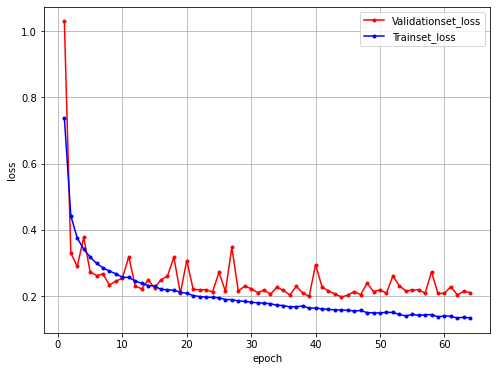

In [336]:
import numpy as np

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()